In [1]:
# importing the requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


In [2]:
# importing the data
df= pd.read_csv("Foodmart_dataset.csv",index_col=0)

### Exploratory Data Analysis

In [33]:
# printing the first 5 rows
df.head(5)

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,...,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,...,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


In [34]:
# checking the shape of the data
df.shape

(269720, 74)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269720 entries, 0 to 269719
Data columns (total 74 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  educa

In [36]:
# checking about the NaN values
df.isna().sum()

product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department              0
family      

There are no missing values

In [37]:
# creating a temp df to get a quick glance of all columns and 
temp = pd.DataFrame(df.dtypes).reset_index().rename(columns={'index':'features',0:'dtype'})
temp['nunique'] = df.nunique().values

temp

,features,dtype,nunique
0,product_id,int64,1559
1,time_id,int64,673
2,customer_id,int64,8842
3,store_id,int64,24
4,store_sales,float64,1069
5,store_cost,float64,12535
6,unit_sales,int64,6
7,city,object,107
8,state_province,object,12
9,country,object,3


In [38]:
# dropping the duplicates
df=df.drop_duplicates()

### Univariate Analysis

#### 1. Product

There are 1559 no of products


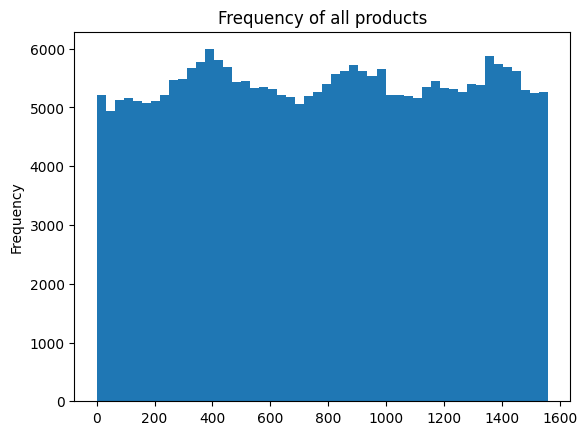

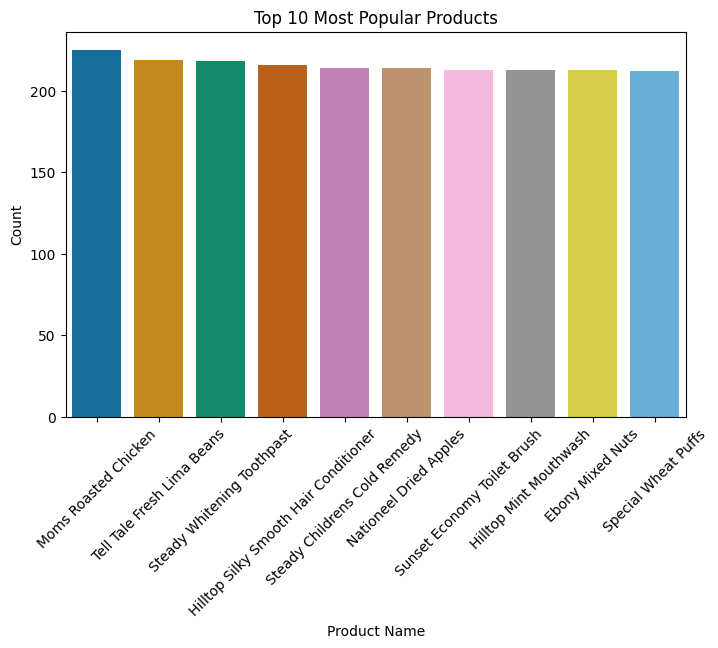

In [39]:
# checking the unique no of products
unique_prods = df['product_id'].nunique()
print(f"There are {unique_prods} no of products")

# printing the frequency of all products
df['product_id'].plot.hist(bins=50)
plt.title("Frequency of all products")

# getting the top 10 products
popular_products = df['product_name'].value_counts().head(10) 

# Plotting with Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x=popular_products.index, y=popular_products.values,palette="colorblind")
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 2. Product Category / Department 

There are 22 no of departments


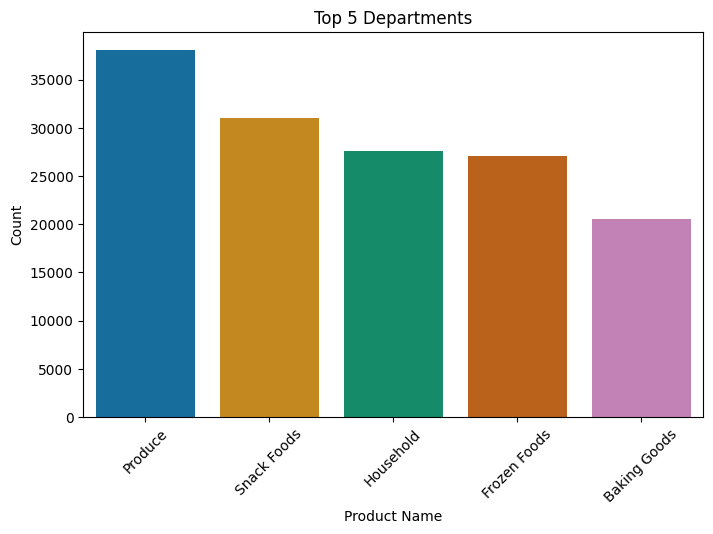

In [40]:
# getting the total no of departments
print(f"There are {df['department'].nunique()} no of departments")

# getting the top 10 departments
top5_depts = df['department'].value_counts().head(5) 

# Plotting with Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x=top5_depts.index, y=top5_depts.values,palette="colorblind")
plt.title('Top 5 Departments')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

There are 102 no of product classes



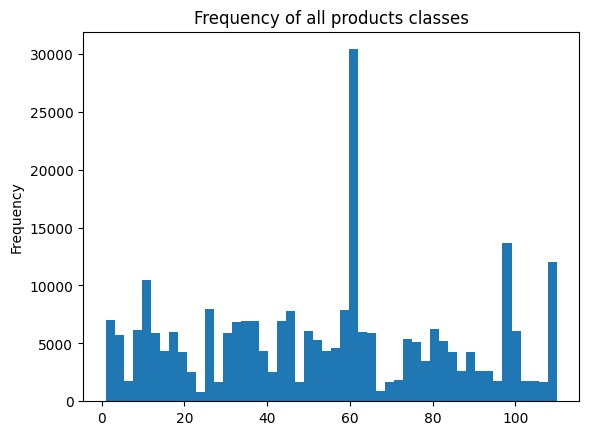

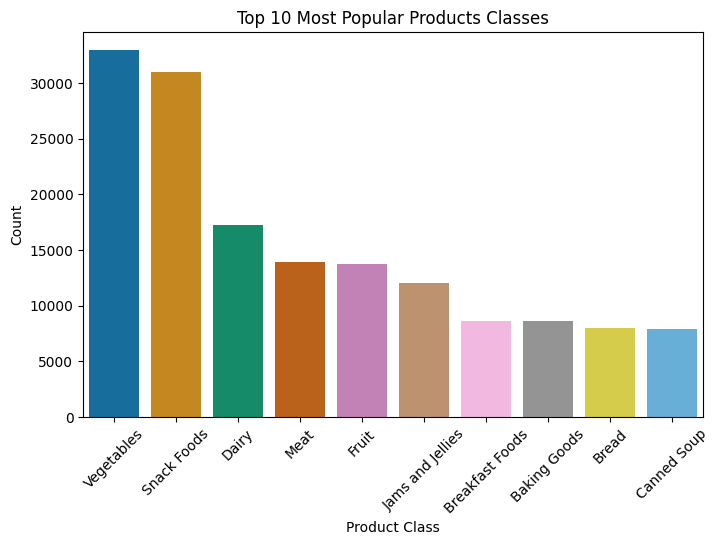

In [41]:
# checking the unique no of products
unique_prods_classes = df['product_class_id'].nunique()
print(f"There are {unique_prods_classes} no of product classes\n")

# printing the frequency of all products
df['product_class_id'].plot.hist(bins=50)
plt.title("Frequency of all products classes")

# getting the top 10 products
top10_products_classes = df['category'].value_counts().head(10) 

# Plotting with Seaborn
plt.figure(figsize=(8,5))
sns.barplot(x=top10_products_classes.index, y=top10_products_classes.values,palette="colorblind")
plt.title('Top 10 Most Popular Products Classes')
plt.xlabel('Product Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

If you look in the histplot there is a product class whose frequency is much higher than the others. this could be vegetable

#### 3. Unit sales

Text(0.5, 1.0, 'Frequency of unit sales')

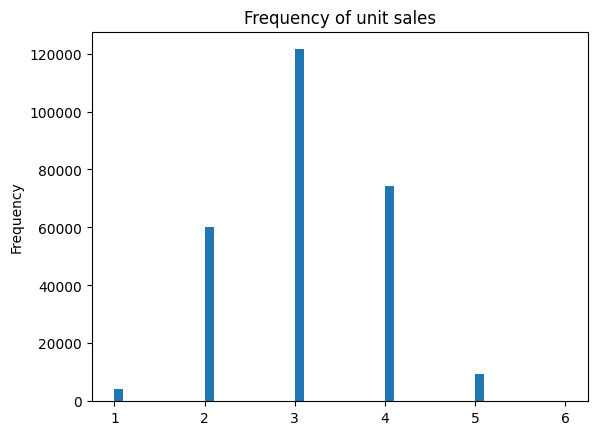

In [42]:
# printing the frequency of all units size
df['unit_sales'].plot.hist(bins=50)
plt.title("Frequency of unit sales")

We can see that most of the user are buying 3 units 

#### 4. Time Features

##### i) Day 

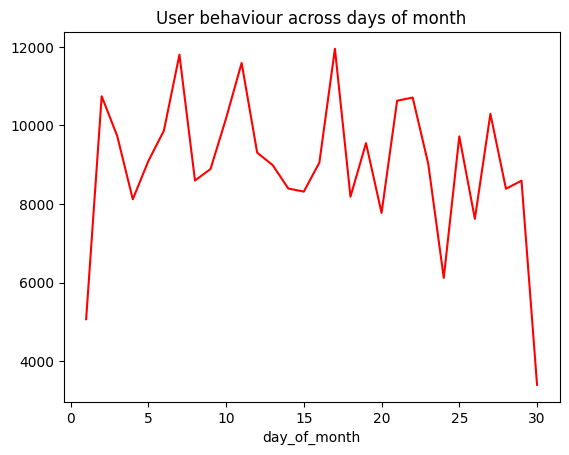

In [43]:
df['day_of_month'].value_counts().sort_index().plot(kind='line', color='red')
plt.title("User behaviour across days of month")
plt.show()

##### ii) Month

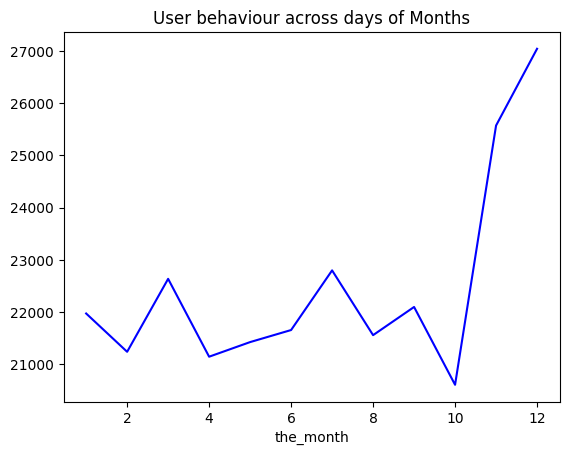

In [44]:
df['the_month'].value_counts().sort_index().plot(kind='line', color='blue')
plt.title("User behaviour across days of Months")
plt.show()

##### iii) Year

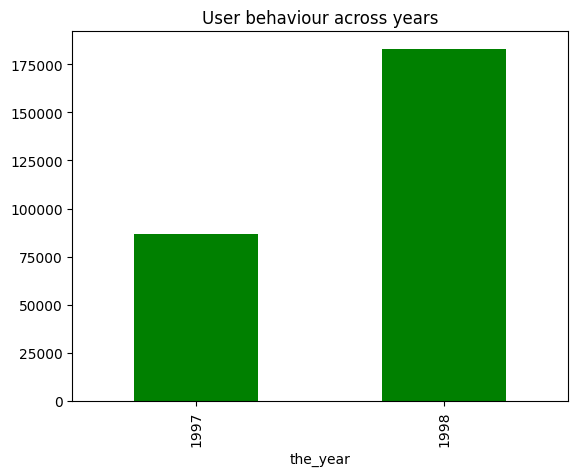

In [45]:
df['the_year'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("User behaviour across years")
plt.show()

##### iv) Day of the week

Text(0.5, 1.0, 'User behaviour across days of week')

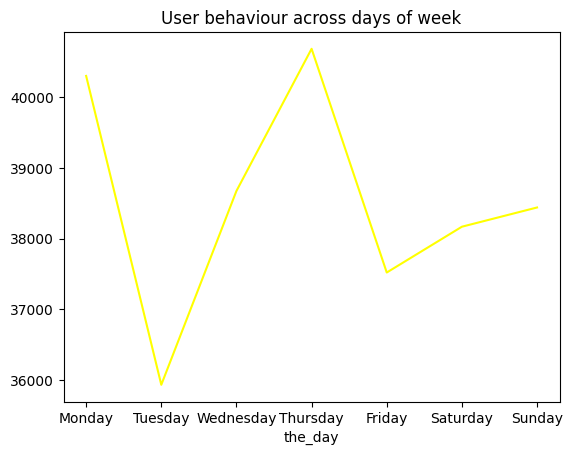

In [46]:
def custom_sort_key(index):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    # Create a dictionary that maps each day to its index
    day_order = {day: i for i, day in enumerate(days_of_week)}
    # Return the corresponding index for each day in the Series
    return index.map(day_order)

    
df['the_day'].value_counts().sort_index(key=custom_sort_key).plot(kind='line', color='yellow')
plt.title("User behaviour across days of week")


#### Creating Transaction_ID

In our data we don't have the transaction_id, so let's create transaction_id ourself to identify the baskets  (group of products purchased in a single transaction)

In [47]:
# creating the transaction_id
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

In [48]:
# selecting the columns of interest
orders = df[['customer_id','transaction_id','product_id','product_name']]
orders.head()

,customer_id,transaction_id,product_id,product_name
0,6280,6280371,337,Better Turkey Noodle Soup
1,4018,4018371,963,Just Right Chicken Noodle Soup
2,6280,6280371,1512,Jardon Spaghetti
3,4018,4018371,181,High Top Lettuce
4,4382,4382371,483,Tell Tale Corn on the Cob


Now let's group the orders using the transaction_id to get all the products which have the same transaction_id that is which falls under the same basket

#### Customer data

In [49]:
# grouping the orders using the customer_id to get the total no of transactions and total no of products purchased for each customer
cust_data = orders.groupby('customer_id').agg({'transaction_id':'nunique','product_id':'count'}).rename(columns={'transaction_id':'transactions','product_id':'products'})

# creating the avg column which denotes the avg no of products per transaction
cust_data['avg'] = cust_data['products']/cust_data['transactions']
cust_data.head()

,transactions,products,avg
customer_id,,,
3,5,30,6.0
5,1,1,1.0
6,4,16,4.0
8,10,42,4.2
9,2,13,6.5


### Apriori Algorithm

In [50]:
# importing the required libraries 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder

In [51]:
# selecting the columns 
data = df[['transaction_id','customer_id','product_id','product_name','unit_sales','time_id']]
data.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
0,6280371,6280,337,Better Turkey Noodle Soup,2,371
1,4018371,4018,963,Just Right Chicken Noodle Soup,1,371
2,6280371,6280,1512,Jardon Spaghetti,3,371
3,4018371,4018,181,High Top Lettuce,3,371
4,4382371,4382,483,Tell Tale Corn on the Cob,2,371


Counting the no of transaction each product has appeared in

In [52]:
# counting the no of transaction each product has appeared in
product_count = data.groupby('product_id')['transaction_id'].nunique()
product_count = pd.DataFrame(product_count).rename(columns={'transaction_id':'count'})

# sorting the dataframe in descending order
product_count.sort_values('count',ascending=False,inplace=True)
product_count.head()


,count
product_id,
382,225
502,219
426,217
1362,216
865,214


Since we have very large no of products, running Apriori algorithm takes longer time and expensiv. so let's limit ourself to only top 100 frequent products

In [53]:
# filtering the top 100 
top100_products = product_count
top100_products =list(top100_products.index)

# filtering those only transaction which has anyone of this top100 products
mask = data['product_id'].isin(top100_products)
df = data[mask]
df.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
0,6280371,6280,337,Better Turkey Noodle Soup,2,371
1,4018371,4018,963,Just Right Chicken Noodle Soup,1,371
2,6280371,6280,1512,Jardon Spaghetti,3,371
3,4018371,4018,181,High Top Lettuce,3,371
4,4382371,4382,483,Tell Tale Corn on the Cob,2,371


In [54]:
# creating the dataset for apriori algorithm
apriori_df = df.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

# doing one hot encoding

def ohe(x):
    if x<=0:
        return 0
    else:
        return 1

# applying One Hot encoding
apriori_df = apriori_df.applymap(ohe)
apriori_df.head()


product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
transaction_id,,,,,,,,,,,,,,,,,,,,,
100001063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000850,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# lets check about the data
apriori_df.shape

(58308, 1559)

### Apriori Algorithm

In [60]:
# setting-up the hyperparameters
MIN_SUPPORT= 0.0001
MIN_LIFT=50
MIN_CONFIDENCE=0.01
# generating the frequent_item sets using apriori
frequent_itemsets = apriori(apriori_df,min_support=MIN_SUPPORT,use_colnames=True,low_memory=True)
frequent_itemsets.head()

,support,itemsets
0,0.003396,(ADJ Rosy Sunglasses)
1,0.002898,(Akron City Map)
2,0.003207,(Akron Eyeglass Screwdriver)
3,0.002898,(American Beef Bologna)
4,0.002744,(American Chicken Hot Dogs)


In [61]:
# mining association rules
apriori_rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)
apriori_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Booker Low Fat Sour Cream),(ADJ Rosy Sunglasses),0.002916,0.003396,0.000103,0.035294,10.393583,0.000093,1.033065,0.906430
1,(ADJ Rosy Sunglasses),(Booker Low Fat Sour Cream),0.003396,0.002916,0.000103,0.030303,10.393583,0.000093,1.028243,0.906866
2,(ADJ Rosy Sunglasses),(Denny Silver Cleaner),0.003396,0.003001,0.000103,0.030303,10.096623,0.000093,1.028155,0.904027
3,(Denny Silver Cleaner),(ADJ Rosy Sunglasses),0.003001,0.003396,0.000103,0.034286,10.096623,0.000093,1.031987,0.903669
4,(ADJ Rosy Sunglasses),(Ebony Corn on the Cob),0.003396,0.003224,0.000103,0.030303,9.398453,0.000092,1.027925,0.896644


In [62]:


# filtering recommendations where lift is greater than 50 and confidence is greater than 0.01
apriori_rules_filtered = apriori_rules[(apriori_rules['lift']>=MIN_LIFT) & (apriori_rules['confidence']>=MIN_CONFIDENCE)]

# unfreezing the antecedents and consequents columns
apriori_rules_filtered['antecedents']=apriori_rules_filtered['antecedents'].apply(lambda x:set(x))
apriori_rules_filtered['consequents']=apriori_rules_filtered['consequents'].apply(lambda x:set(x))

# exporting the rules for inference
apriori_rules_filtered.to_pickle('association_rules.pkl')

apriori_rules_filtered.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10506,"{American Foot-Long Hot Dogs, Bird Call Conditioning Shampoo}",{Horatio BBQ Potato Chips},0.000120,0.002898,0.000103,0.857143,295.729501,0.000103,6.979711,0.996738
10507,"{American Foot-Long Hot Dogs, Horatio BBQ Potato Chips}",{Bird Call Conditioning Shampoo},0.000103,0.003121,0.000103,1.000000,320.373626,0.000103,inf,0.996981
10508,"{Bird Call Conditioning Shampoo, Horatio BBQ Potato Chips}",{American Foot-Long Hot Dogs},0.000103,0.002933,0.000103,1.000000,340.982456,0.000103,inf,0.997170
10509,{American Foot-Long Hot Dogs},"{Bird Call Conditioning Shampoo, Horatio BBQ Potato Chips}",0.002933,0.000103,0.000103,0.035088,340.982456,0.000103,1.036257,1.000000
10510,{Bird Call Conditioning Shampoo},"{American Foot-Long Hot Dogs, Horatio BBQ Potato Chips}",0.003121,0.000103,0.000103,0.032967,320.373626,0.000103,1.033984,1.000000
10511,{Horatio BBQ Potato Chips},"{American Foot-Long Hot Dogs, Bird Call Conditioning Shampoo}",0.002898,0.000120,0.000103,0.035503,295.729501,0.000103,1.036685,0.999516
10512,"{Tell Tale Mandarin Oranges, American Sliced Chicken}",{Medalist Rice Medly},0.000103,0.003053,0.000103,1.000000,327.573034,0.000103,inf,0.997050
10513,"{Tell Tale Mandarin Oranges, Medalist Rice Medly}",{American Sliced Chicken},0.000103,0.002727,0.000103,1.000000,366.716981,0.000103,inf,0.997376
10514,"{American Sliced Chicken, Medalist Rice Medly}",{Tell Tale Mandarin Oranges},0.000103,0.002641,0.000103,1.000000,378.623377,0.000103,inf,0.997461
10515,{Tell Tale Mandarin Oranges},"{American Sliced Chicken, Medalist Rice Medly}",0.002641,0.000103,0.000103,0.038961,378.623377,0.000103,1.040433,1.000000


In [73]:
# building a function to get the recommendations
def recommend(item):
    """ 
    item : dicationary of items 
    returns a list of dictionaries where each dictionary is a recommendation having one or more products
    
    """
    # initializing an empty list to store recommendations
    recommendations=[]
    
    # loading the association_rules 
    rules = pd.read_pickle('association_rules.pkl')
    
    # computing the no of rules
    n=rules.shape[0]
    
    # iterating through each rules and getting the recommendations
    for i in range(n):
        if item==rules.iloc[i,0]:
            # getting the recommendation (a recommendation may consists one or more products)
            recommendation= rules.iloc[i,1]
            # iterating through the each recommendation
            for j in recommendation:
                recommendations.append(j)

    return set(recommendations)

In [75]:
product_name = {'Quick Extra Lean Hamburger'}
recommend(product_name)

{'CDR Hot Chocolate', 'Imagine Low Fat French Fries'}